# **Assignment 6: Providing Data-driven Suggestions for HR**

This assignment is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a fictional consulting firm.

Stages of workflow

- Plan
- Analyze
- Construct 
- Execute

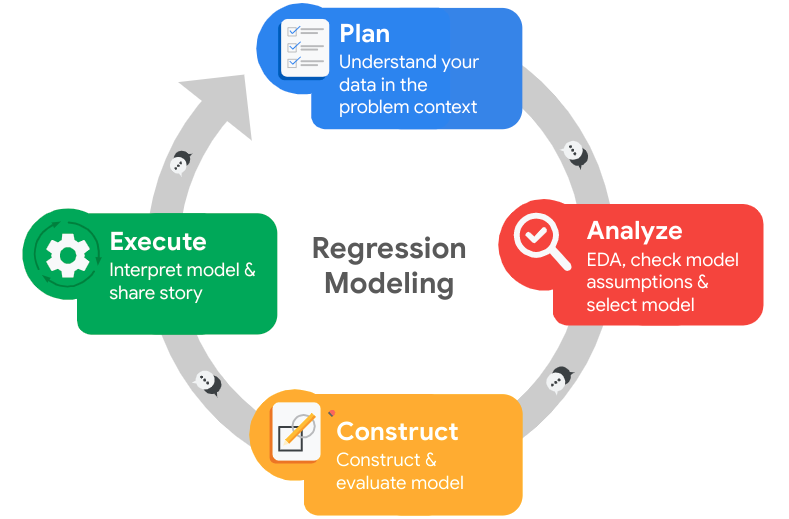



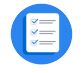  

# Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it may be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭 
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? 
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- Do you have any ethical considerations in this stage? 




[Double-click to enter your responses here.]

- The stakeholders for this project are the Salifort Motors HR department officials. 
- We want to analyze the data collected by Salifort Motors HR department and to build a model that predicts whether or not an employee will leave the company.
- There are 14,999 rows and 10 variables columns and there are two float, six int and two object variables. Also On average satisfaction level of employees is approximately 61%.
- 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import OneHotEncoder

# For data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# For metrics
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [ ]:
# Load dataset into a dataframe
### YOUR CODE HERE ### 
hr_data = pd.read_csv('HR_dataset.csv')

# Display first few rows of the dataframe
### YOUR CODE HERE ### 
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
### YOUR CODE HERE ### 
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ### 
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
### YOUR CODE HERE ### 
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
### YOUR CODE HERE ### 
hr_data.rename(columns = {'average_montly_hours':'average_monthly_hours',
                          'Work_accident':'work_accident', 
                          'left' : 'left_company',
                          'Department':'company_department',
                          'salary':'employee_salary'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ### 
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'left_company', 'promotion_last_5years', 'company_department',
       'employee_salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
### YOUR CODE HERE ###
hr_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left_company             0
promotion_last_5years    0
company_department       0
employee_salary          0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
### YOUR CODE HERE ###
hr_data.duplicated().sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
hr_data[hr_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_company,promotion_last_5years,company_department,employee_salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
hr_subset = hr_data.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
hr_subset.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_company,promotion_last_5years,company_department,employee_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Check how many employee have left the company in dataset
hr_subset['left_company'].value_counts()

0    10000
1     1991
Name: left_company, dtype: int64

There are 10000 employees who haven't left the company and 1991 who have left the company.

In [ ]:
# Check the percentage
hr_subset['left_company'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left_company, dtype: float64

Approximately, 16.6 percent of employees who have left the company.

### Check outliers

Check for outliers in the data.

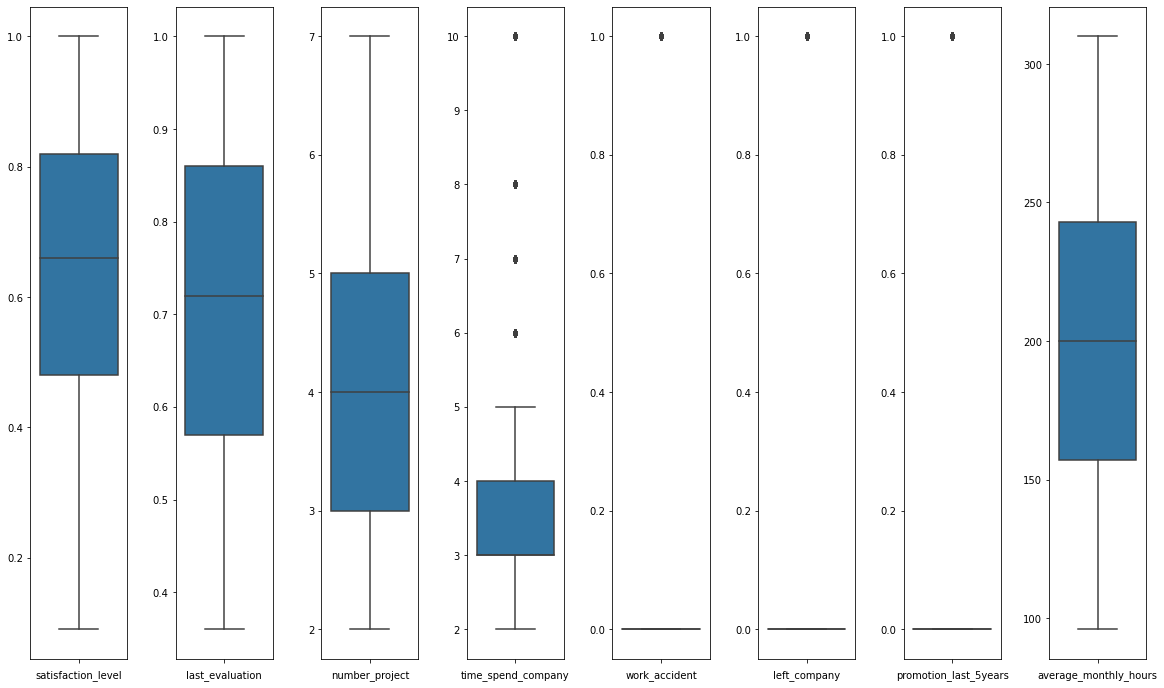

In [ ]:
# Create a boxplot to visualize outliers
### YOUR CODE HERE ###
fig, ax=plt.subplots(1, 8, figsize=(20,12))
plt.subplots_adjust(wspace=0.5)

sns.boxplot(data=hr_subset['satisfaction_level'], ax=ax[0])
ax[0].set_xlabel('satisfaction_level')

sns.boxplot(data=hr_subset['last_evaluation'], ax=ax[1])
ax[1].set_xlabel('last_evaluation')

sns.boxplot(data=hr_subset['number_project'], ax=ax[2])
ax[2].set_xlabel('number_project')

sns.boxplot(data=hr_subset['time_spend_company'], ax=ax[3])
ax[3].set_xlabel('time_spend_company')

sns.boxplot(data=hr_subset['work_accident'], ax=ax[4])
ax[4].set_xlabel('work_accident')

sns.boxplot(data=hr_subset['left_company'], ax=ax[5])
ax[5].set_xlabel('left_company')

sns.boxplot(data=hr_subset['promotion_last_5years'], ax=ax[6])
ax[6].set_xlabel('promotion_last_5years')

sns.boxplot(data=hr_subset['average_monthly_hours'], ax=ax[7])
ax[7].set_xlabel('average_monthly_hours')

for subplot in ax:
    subplot.set_xticklabels([])

plt.show()

In [ ]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###
hr_subset.query("time_spend_company >= 6")

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_company,promotion_last_5years,company_department,employee_salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

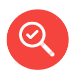
# Analyze Stage
- Perform EDA (analyze relationships between variables) 



💭 
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data? 
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

**The relationships between variables**
- From the scatterplots and heatmaps plotted below indicates that there are low negative correlation between satisfaction_level and left_company; between time_spend_company and satisfaction_level and between work_accident and left_company and there is a low positive correction between time_spend_company and left_company.
- The number of employees who have low salary and have left the company is higher compared to employees who have medium salary and have left and have high salary and have left the company.

**The distributions in the data**
- Majority of employees satisfaction_level lies between 0.4 and 1.0.
- The most number of projects employees contributes are four.
- The distribution of average monthly hours takes bimodal distribution
- The distribution of time_spend_company is skewed to the right with majority of employees between 2 and 5 years.
- Most of employees have not experienced accident while working, have not left the company nor have been promoted in the last 5 years.

**Transformations made with the data**
- Converted employee salary categorical column into numeric through one-hot encoding. In the encoded column 1 represents low while 0 represents either medium or high.

**Some purposes of EDA before constructing a predictive model**
- Have a look at the dataset before making assumptions
- Have a better understanding of the dataset variables and relationships between them
- Helps detect ouliers in the dataset.


## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

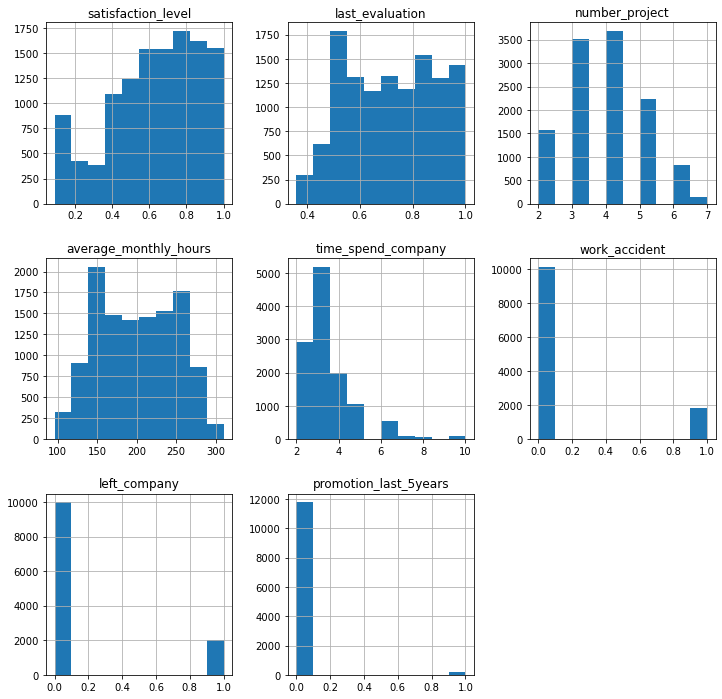

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
hr_subset.hist(figsize=(12,12))
plt.show()

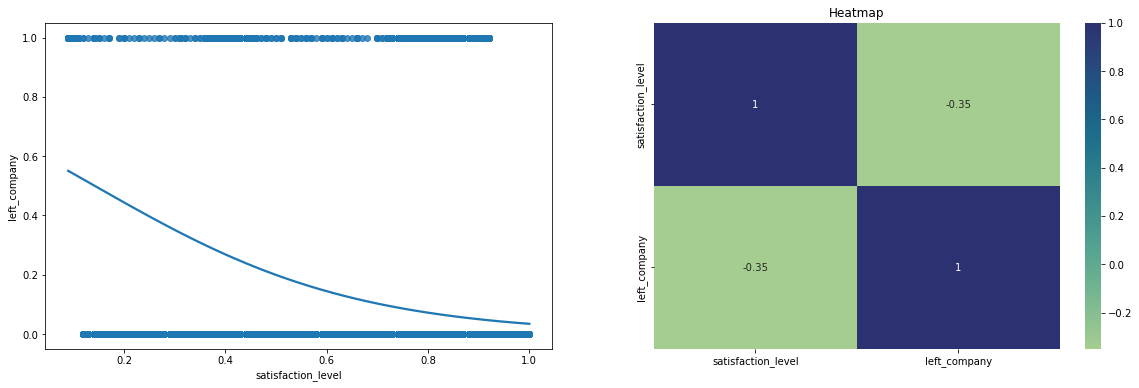

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sns.regplot(data=hr_subset, x='satisfaction_level', y='left_company', logistic=True, ci=None)

plt.subplot(1,2,2)
sns.heatmap(hr_subset[['satisfaction_level', 'left_company']].corr(), annot=True, cmap='crest')
plt.title('Heatmap')
plt.show()

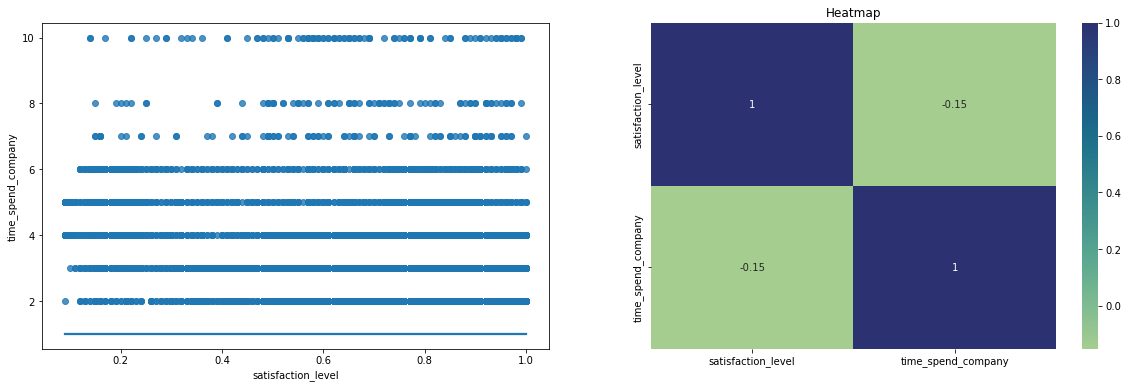

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sns.regplot(data=hr_subset, x='satisfaction_level', y='time_spend_company', logistic=True, ci=None)
plt.subplot(1,2,2)
sns.heatmap(hr_subset[['satisfaction_level', 'time_spend_company']].corr(), annot=True, cmap='crest')
plt.title('Heatmap')
plt.show()

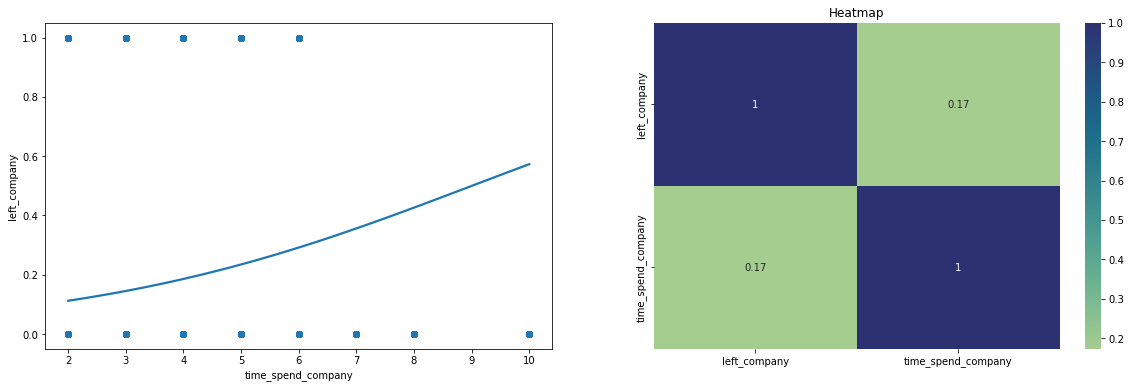

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sns.regplot(data=hr_subset, x='time_spend_company', y='left_company', logistic=True, ci=None)
plt.subplot(1,2,2)
sns.heatmap(hr_subset[['left_company', 'time_spend_company']].corr(), annot=True, cmap='crest')
plt.title('Heatmap')
plt.show()

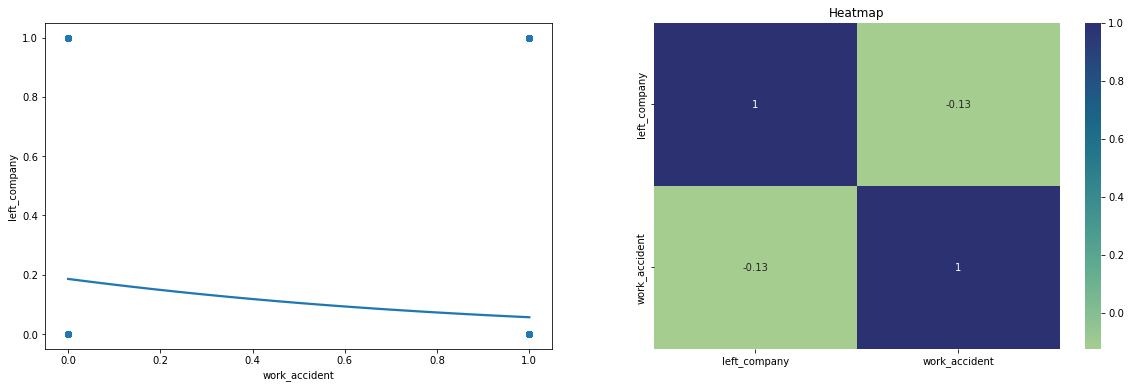

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sns.regplot(data=hr_subset, x='work_accident', y='left_company', logistic=True, ci=None)
plt.subplot(1,2,2)
sns.heatmap(hr_subset[['left_company', 'work_accident']].corr(), annot=True, cmap='crest')
plt.title('Heatmap')
plt.show()

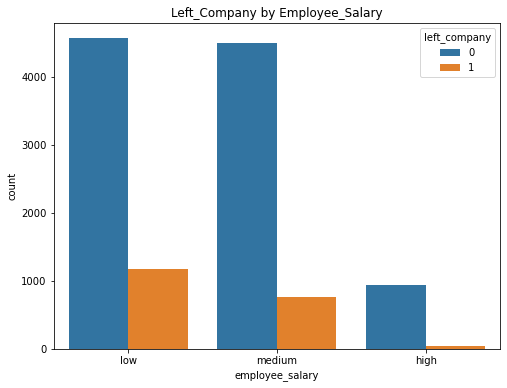

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=(8,6))
sns.countplot(data=hr_subset, x='employee_salary', hue='left_company')
plt.title('Left_Company by Employee_Salary')
plt.show()

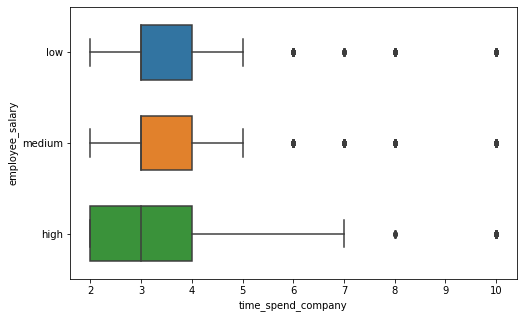

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=(8,5))
sns.boxplot(data=hr_subset, y='employee_salary', x='time_spend_company', width=0.6)
plt.show()

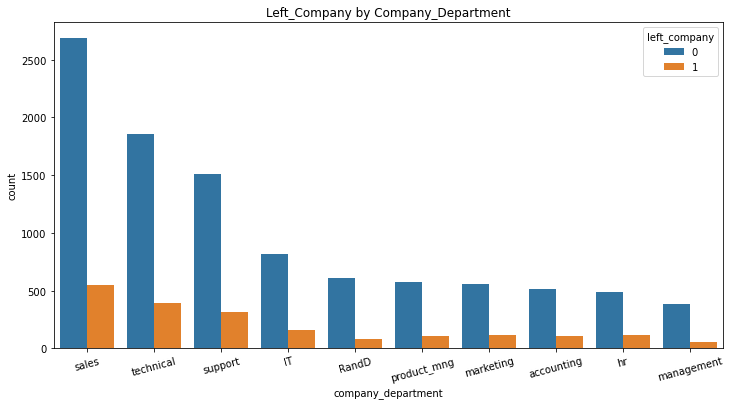

In [ ]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=(12,6))
sns.countplot(data=hr_subset, x='company_department', hue='left_company', order=hr_subset['company_department'].value_counts().index)
plt.xticks(rotation=15)
plt.title('Left_Company by Company_Department')
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

**From the histograms plots**
- Majority of employees satisfaction_level lies between 0.4 and 1.0.
- The most number of projects employees contributes are four.
- The distribution of average monthly hours takes bimodal distribution
- The distribution of time_spend_company is skewed to the right with majority of employees between 2 and 5 years.
- Most of employees have not experienced accident while working, have not left the company nor have been promoted in the last 5 years.

**From the scatterplots and heatmaps plotted above we see:**
- There is a weak negative correlation between satisfaction_level and left_company; between time_spend_company and satisfaction_level and between work_accident and left_company.
- There is a weak positive correction between time_spend_company and left_company. As the time spend in the company increases chances leaving the company increases.

- From the clustered bar plot, the number of employees who have low salary and have left the company is higher compared to employees who have medium salary and have left and have high salary and have left the company.

- Sales department has the highest number of both employees who have left and not left the company followed by technical department.

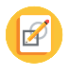
#Construct Stage
- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
##Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables 
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size 





💭 
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model, and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

- The independent variables that are chosen for the model are: satisfaction_level, average_monthly_hours, time_spend_company, work_accident', promotion_last_5years and employee_salary because there is not a strong correlation between the independent variables.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

- The type of prediction task is logistic regression.

### Identify the types of models most appropriate for this task.

- The type of model most appropriate is a binomial logistic regression model.

**Data preparation**

In [ ]:
hr_subset.employee_salary.value_counts()

low       5740
medium    5261
high       990
Name: employee_salary, dtype: int64

In [ ]:
# Create a one-hot encoder and apply it to `employee_salary`
# Convert from sparse matrix to array
OneHotEncoder(drop='first').fit_transform(hr_subset[['employee_salary']])

<11991x2 sparse matrix of type '<class 'numpy.float64'>'
	with 11001 stored elements in Compressed Sparse Row format>

In [ ]:
OneHotEncoder(drop='first').fit_transform(hr_subset[['employee_salary']]).toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 0.],
       [0., 0.],
       [1., 0.]])

In [ ]:
# Reassign `employee_salary` column to the one-hot encoded data
hr_subset['employee_salary'] = OneHotEncoder(drop='first').fit_transform(hr_subset[['employee_salary']]).toarray()

C:\Users\Maureenn\AppData\Local\Temp\ipykernel_7512\3132971585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_subset['employee_salary'] = OneHotEncoder(drop='first').fit_transform(hr_subset[['employee_salary']]).toarray()


In [ ]:
hr_subset.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_company,promotion_last_5years,company_department,employee_salary
0,0.38,0.53,2,157,3,0,1,0,sales,1.0
1,0.80,0.86,5,262,6,0,1,0,sales,0.0
2,0.11,0.88,7,272,4,0,1,0,sales,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,1.0
4,0.37,0.52,2,159,3,0,1,0,sales,1.0
5,0.41,0.50,2,153,3,0,1,0,sales,1.0
6,0.10,0.77,6,247,4,0,1,0,sales,1.0
7,0.92,0.85,5,259,5,0,1,0,sales,1.0
8,0.89,1.00,5,224,5,0,1,0,sales,1.0
9,0.42,0.53,2,142,3,0,1,0,sales,1.0


In [ ]:
hr_subset.time_spend_company.value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [ ]:
# Remove the rows containing outliers
hr_subset = hr_subset[hr_subset.time_spend_company < 6]
hr_subset

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_company,promotion_last_5years,company_department,employee_salary
0,0.38,0.53,2,157,3,0,1,0,sales,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,0.0
3,0.72,0.87,5,223,5,0,1,0,sales,1.0
4,0.37,0.52,2,159,3,0,1,0,sales,1.0
5,0.41,0.50,2,153,3,0,1,0,sales,1.0
...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,sales,0.0
11986,0.48,0.50,5,142,4,0,0,0,IT,0.0
11987,0.19,0.79,4,229,4,0,0,0,product_mng,0.0
11992,0.62,0.85,3,237,3,1,0,0,IT,0.0


### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
### Isolate x and y
x = hr_subset[['satisfaction_level', 'average_monthly_hours','time_spend_company', 'work_accident',  
                'promotion_last_5years', 'employee_salary']]
y = hr_subset['left_company']

In [ ]:
# Get first few rows of x
x.head()

,satisfaction_level,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,employee_salary
0,0.38,157,3,0,0,1.0
2,0.11,272,4,0,0,0.0
3,0.72,223,5,0,0,1.0
4,0.37,159,3,0,0,1.0
5,0.41,153,3,0,0,1.0


In [ ]:
# Get first few rows of y
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left_company, dtype: int64

In [ ]:
ind_vars = ['satisfaction_level', 'average_monthly_hours','time_spend_company', 'work_accident', 
            'promotion_last_5years', 'employee_salary']

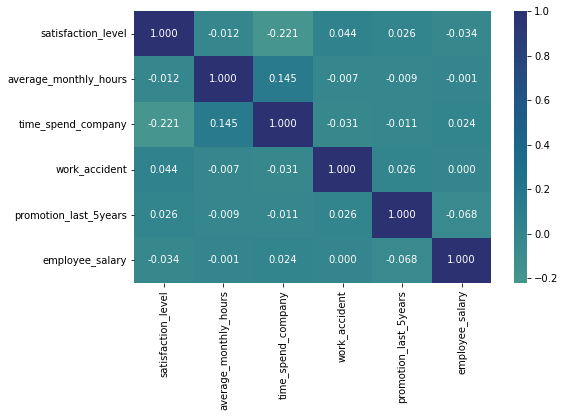

In [ ]:
# Plot heatmap correlation plot
plt.figure(figsize = [8,5])
sns.heatmap(hr_subset[ind_vars].corr(), annot=True, fmt='.3f',
            cmap='crest', center=0)
plt.show()

As the heatmap above shows, there is not strong correlation between each two independent variables. So the no multicollinearity assumption is met.

**Create the training and testing data**

In [ ]:
# split data into training (70%) and test (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Get shape of each training and testing set
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7816, 6), (3351, 6), (7816,), (3351,))

**Model Building**

In [ ]:
# Building a logistic regression model and fit the model to the training data
clf = LogisticRegression().fit(x_train,y_train)

In [ ]:
clf.coef_

array([[-3.92064345e+00, -1.73273901e-03,  8.44610347e-01,
        -1.43716050e+00, -3.37429905e-01,  5.60519856e-01]])

**Results and Evaluation**

In [ ]:
# Save predictions
y_pred = clf.predict(x_test)

In [ ]:
# Examine the predictions
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
clf.predict_proba(x_test)

array([[0.92206003, 0.07793997],
       [0.86779891, 0.13220109],
       [0.65514209, 0.34485791],
       ...,
       [0.60173647, 0.39826353],
       [0.99609538, 0.00390462],
       [0.99041527, 0.00958473]])

**Analyze resuls**

In [ ]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.826321
Precision: 0.512111
Recall: 0.251273
F1 Score: 0.337130


**Produce a confusion matrix**

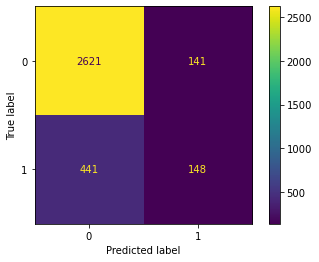

In [ ]:
# Produce a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.show()

**Produce a classification report**

In [ ]:
# Produce a classification report
target_names = ["Not_left", "left"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Not_left       0.86      0.95      0.90      2762
        left       0.51      0.25      0.34       589

    accuracy                           0.83      3351
   macro avg       0.68      0.60      0.62      3351
weighted avg       0.80      0.83      0.80      3351



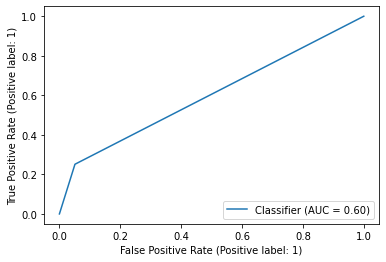

In [ ]:
# Plotting the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
# AUC score
metrics.roc_auc_score(y_test, y_pred)

0.6001116904288002

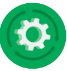
#Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
##Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. 
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭 
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How? 
- What business recommendations do you propose based on the models built? 
- Given what you know about the data and the models you were using, what other questions could you address for the team? 
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

**Key insights emerged from the model(s)**
- Training a logistic regression model on six independent variables can produce a relatively good model with 83 percent accuracy. Although the accuracy is based since there is a much larger proportion of negative examples(not left) than positive examples(left).
- The Precision scored 0.51211 which means about 51 percent of positive predictions that are true positives.
- From the confusion matrix, the count of true negative, true positive, false postive and false negative are 2621, 148, 141 and 441 respectively.
- The AUC of 0.6 indicates that the model performs better than a random classifier. 60% of the classifier's predictions are correct across all classification thresholds.

**Business recommendations based on the model(s) built**
- The model accurately predicted left company 83 percent of the time. To improve the success of the model by reducing the independent variables leads to better results.

**Potential recommendations to make to your manager/company**
- Employees who report low job satisfation, spend longer in the company, experienced work accident, not promoted in last 5 years and with low salary are more likely to leave the company. By improving employee satisfaction, increasing the number of promotions and salaries should lead to better employee retention.

**Improving the model**
- Yes, i think the model could be improved to increase the accuracy by reducing the number of independent variables or can use tranformations like logarithmic transformation or standardization to make some features variables to improve the performance of the model. Also having more than one classifier.

##Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

**Metrics**

- Accuracy: 0.826321
- Precision: 0.512111
- Recall: 0.251273
- F1 Score: 0.337130

The roc_auc_score returns a score of 0.6001116904288002 which means 60 percent of the classifier predictions are correct across all classification thresholds. The model performs better than a random classifier.

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

- Employees who report low job satisfation, spend longer in the company, experienced work accident, not promoted in last 5 years and with low salary are more likely to leave the company. By improving employee satisfaction, increasing the number of promotions and salaries should lead to better employee retention. 
- The AUC of 0.6 indicates that the model performs better than a random classifier. 60% of the classifier's predictions are correct across all classification thresholds.